# Tree-Based Methods

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

%matplotlib inline
plt.style.use('seaborn-white')

C:\Users\lokma\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Regression Trees

In [2]:
# Reading the Hitters data set by Pandas
df = pd.read_csv('./Textbook_Data/Hitters.csv').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


C:\Users\lokma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\lokma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lokma\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


Text(0.5,0,'Log(Salary)')

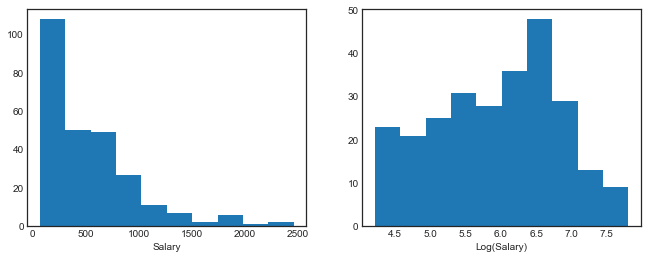

In [3]:
# Create the dependent and independent variables
X = df[['Years', 'Hits']].as_matrix()
y = np.log(df.Salary.as_matrix())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,4))
# Left Plot (Distribution for Salary)
ax1.hist(df.Salary.as_matrix())
ax1.set_xlabel('Salary')
# Right Plot (Distribution for Log(Salary))
ax2.hist(y)
ax2.set_xlabel('Log(Salary)')

In [4]:
# Generate the Decision Tree Regressor Model
regr = DecisionTreeRegressor(max_leaf_nodes=3)
result = regr.fit(X, y)

[Text(133.92,181.2,'X[0] <= 4.5\nmse = 0.788\nsamples = 263\nvalue = 5.927'),
 Text(66.96,108.72,'mse = 0.471\nsamples = 90\nvalue = 5.107'),
 Text(200.88,108.72,'X[1] <= 117.5\nmse = 0.42\nsamples = 173\nvalue = 6.354'),
 Text(133.92,36.24,'mse = 0.312\nsamples = 90\nvalue = 5.998'),
 Text(267.84,36.24,'mse = 0.252\nsamples = 83\nvalue = 6.74')]

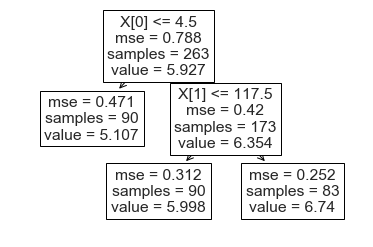

In [5]:
# Plot the Dicision Trees diagram
tree.plot_tree(regr.fit(X,y))

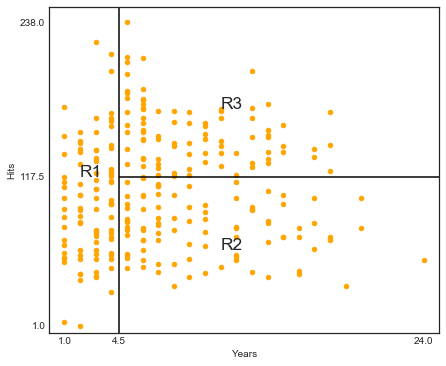

In [6]:
# Ploting the scatter plot
df.plot('Years', 'Hits', kind='scatter', color='orange', figsize=(7,6))
plt.xlim(0,25)
plt.ylim(ymin=-5)
plt.xticks([1, 4.5, 24])
plt.yticks([1, 117.5, 238])
plt.vlines(4.5, ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate('R1', xy=(2,117.5), fontsize='xx-large')
plt.annotate('R2', xy=(11,60), fontsize='xx-large')
plt.annotate('R3', xy=(11,170), fontsize='xx-large');

# Classification Tree

In [7]:
# Loading the Heart data set
df2 = pd.read_csv('Textbook_Data/Heart.csv').drop('Unnamed: 0', axis=1).dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
Age          297 non-null int64
Sex          297 non-null int64
ChestPain    297 non-null object
RestBP       297 non-null int64
Chol         297 non-null int64
Fbs          297 non-null int64
RestECG      297 non-null int64
MaxHR        297 non-null int64
ExAng        297 non-null int64
Oldpeak      297 non-null float64
Slope        297 non-null int64
Ca           297 non-null float64
Thal         297 non-null object
AHD          297 non-null object
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


In [8]:
# Factorize the varaibles for analysis
df2.ChestPain = pd.factorize(df2.ChestPain)[0]
df2.Thal = pd.factorize(df2.Thal)[0]

In [9]:
# Create the dependent and independent variables
X2 = df2.drop('AHD', axis=1)
y2 = pd.factorize(df2.AHD)[0]

In [10]:
# Generate the Decision Tree Classifier Model
clf = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3)
clf.fit(X2, y2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=3, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
# Check the model score
clf.score(X2, y2)

0.8080808080808081

[Text(148.8,190.26,'X[12] <= 1.5\ngini = 0.497\nsamples = 297\nvalue = [160, 137]'),
 Text(74.4,135.9,'X[11] <= 0.5\ngini = 0.393\nsamples = 182\nvalue = [133, 49]'),
 Text(37.2,81.54,'gini = 0.214\nsamples = 123\nvalue = [108, 15]'),
 Text(111.6,81.54,'X[8] <= 0.5\ngini = 0.488\nsamples = 59\nvalue = [25, 34]'),
 Text(74.4,27.18,'gini = 0.495\nsamples = 40\nvalue = [22, 18]'),
 Text(148.8,27.18,'gini = 0.266\nsamples = 19\nvalue = [3, 16]'),
 Text(223.2,135.9,'X[3] <= 109.0\ngini = 0.359\nsamples = 115\nvalue = [27, 88]'),
 Text(186,81.54,'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(260.4,81.54,'X[11] <= 0.5\ngini = 0.322\nsamples = 109\nvalue = [22, 87]'),
 Text(223.2,27.18,'gini = 0.469\nsamples = 48\nvalue = [18, 30]'),
 Text(297.6,27.18,'gini = 0.123\nsamples = 61\nvalue = [4, 57]')]

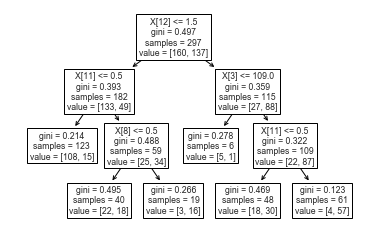

In [12]:
# Plot the decision tree diagram
tree.plot_tree(clf.fit(X2, y2))

# Fitting Classification Trees (Lab)

In [13]:
# Loading the Carseat data set
df3 = pd.read_csv('Textbook_Data/Carseats.csv')
df3.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [14]:
# Create a new column 'High' which store binary value 0 and 1
# If Sales is greater than 8, it's categroized as "High".
df3['High'] = df3.Sales.map(lambda x: 1 if x>8 else 0)

# Factorize the ShelveLoc column and replace the original
# Note pd.factorize() function always return [0] labels and [1] uniques
df3.ShelveLoc = pd.factorize(df3.ShelveLoc)[0]

# Create a dictionary for the binary varialbe 'Urban' and replace the original
df3.Urban = df3.Urban.map({'No':0, 'Yes':1})

# Create a dictionary for the binary variable 'US' and replace the original
df3.US = df3.US.map({'No':0, 'Yes':1})

# Check the data frame information
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null int64
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null int64
US             400 non-null int64
High           400 non-null int64
dtypes: float64(1), int64(11)
memory usage: 37.6 KB


In [15]:
df3.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [16]:
# Create the dependent and independent variables
X = df3.drop(['Sales', 'High'], axis=1)
y = df3.High

# Split the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [17]:
# Generate the Decision Tree Classifier Model
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
# Printing the classification report
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       236
           1       0.98      0.82      0.89       164

    accuracy                           0.92       400
   macro avg       0.93      0.90      0.91       400
weighted avg       0.92      0.92      0.92       400



[Text(133.833,201.909,'X[4] <= 92.5\ngini = 0.484\nsamples = 400\nvalue = [236, 164]'),
 Text(45.3375,170.846,'X[5] <= 0.5\ngini = 0.35\nsamples = 62\nvalue = [14, 48]'),
 Text(20.925,139.783,'X[1] <= 58.0\ngini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(13.95,108.72,'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(27.9,108.72,'X[2] <= 9.5\ngini = 0.375\nsamples = 12\nvalue = [3, 9]'),
 Text(20.925,77.6571,'X[2] <= 6.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(13.95,46.5943,'X[3] <= 120.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(6.975,15.5314,'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(20.925,15.5314,'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(27.9,46.5943,'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(34.875,77.6571,'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(69.75,139.783,'X[3] <= 198.5\ngini = 0.169\nsamples = 43\nvalue = [4, 39]'),
 Text(62.775,108.72,'X[6] <= 64.0\ngini = 0.36\nsamples = 17\nvalue = [4, 13]'),
 Text(48.825,77.6571,'X[3

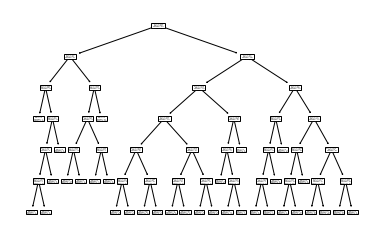

In [19]:
# Plot the Decision Tree diagram
tree.plot_tree(clf.fit(X, y))

In [20]:
# Using the training data for modeling
clf.fit(X_train, y_train)

# Using the testing data for prediction
pred = clf.predict(X_test)

In [21]:
# Create the confusion matrix to check the prediction results
cm = pd.DataFrame(confusion_matrix(y_test, pred).T, index=['No', 'Yes'], 
                 columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,100,32
Yes,18,50


In [22]:
# # Precision of the model using test data is 74%
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       118
           1       0.74      0.61      0.67        82

    accuracy                           0.75       200
   macro avg       0.75      0.73      0.73       200
weighted avg       0.75      0.75      0.75       200



# Fitting Regression Trees

In [23]:
# Loading the Boston data set
boston_df = pd.read_csv('Textbook_Data/Boston.csv')
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [24]:
# Create the dependent and independent variables
X = boston_df.drop('medv', axis=1)
y = boston_df.medv

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


In [25]:
# Generate the Decision Tree Regressor Model
regr2 = DecisionTreeRegressor(max_depth=3)

# Use the training data set for modeling
regr2.fit(X_train, y_train)

# Use the testing data set for prediction
pred = regr2.predict(X_test)

[Text(167.4,190.26,'X[12] <= 7.81\nmse = 92.491\nsamples = 253\nvalue = 23.049'),
 Text(83.7,135.9,'X[5] <= 7.435\nmse = 84.345\nsamples = 86\nvalue = 32.492'),
 Text(41.85,81.54,'X[7] <= 1.485\nmse = 41.903\nsamples = 68\nvalue = 28.978'),
 Text(20.925,27.18,'mse = 0.0\nsamples = 3\nvalue = 50.0'),
 Text(62.775,27.18,'mse = 22.499\nsamples = 65\nvalue = 28.008'),
 Text(125.55,81.54,'X[10] <= 15.4\nmse = 21.812\nsamples = 18\nvalue = 45.767'),
 Text(104.625,27.18,'mse = 5.79\nsamples = 11\nvalue = 48.636'),
 Text(146.475,27.18,'mse = 13.714\nsamples = 7\nvalue = 41.257'),
 Text(251.1,135.9,'X[12] <= 15.0\nmse = 27.121\nsamples = 167\nvalue = 18.186'),
 Text(209.25,81.54,'X[5] <= 6.53\nmse = 12.255\nsamples = 87\nvalue = 21.566'),
 Text(188.325,27.18,'mse = 6.248\nsamples = 74\nvalue = 20.784'),
 Text(230.175,27.18,'mse = 23.169\nsamples = 13\nvalue = 26.015'),
 Text(292.95,81.54,'X[7] <= 1.918\nmse = 17.363\nsamples = 80\nvalue = 14.511'),
 Text(272.025,27.18,'mse = 13.188\nsamples = 3

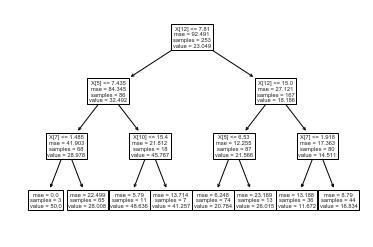

In [26]:
tree.plot_tree(regr2.fit(X_train, y_train))

Text(0,0.5,'y_test')

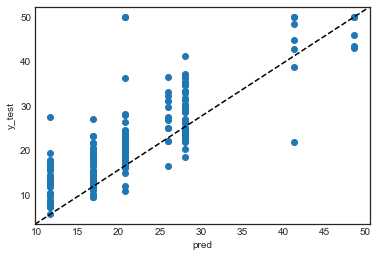

In [27]:
# Plot the preduction against the actual test value
plt.scatter(pred, y_test, label='medv')
plt.plot([0,1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [28]:
# Checking the mean squared error
mean_squared_error(y_test, pred)

26.02323085009744

# Bagging and Random Forests

In [29]:
# Check how many rows and features in X
X.shape

(506, 13)

In [30]:
# Bagging: using all features
regr1 = RandomForestRegressor(max_features=13, random_state=1)
regr1.fit(X_train, y_train)

C:\Users\lokma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=13, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [31]:
# Use the test data set for prediction
pred = regr1.predict(X_test)

Text(0,0.5,'y_test')

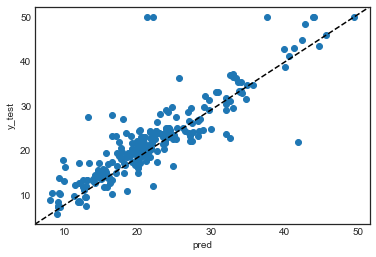

In [32]:
# Plot the predictions against the actual test values
plt.scatter(pred, y_test, label='medv')
plt.plot([0,1],[0,1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [33]:
# Checking the mean squared error 
mean_squared_error(y_test, pred)

18.290404743083002

In [34]:
# Try to use only 6 features for the Random Forest Model
regr2 = RandomForestRegressor(max_features=6, random_state=1)
regr2.fit(X_train, y_train)

C:\Users\lokma\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [35]:
# Use the test data set for prediction
pred2 = regr2.predict(X_test)

Text(0,0.5,'y_test')

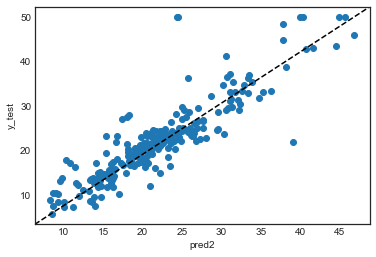

In [36]:
# Plot the predictions against the actual test values
plt.scatter(pred2, y_test, label='medv')
plt.plot([0,1],[0,1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred2')
plt.ylabel('y_test')

In [37]:
# Checking the mean squared error 
mean_squared_error(y_test, pred2)

16.462186166007907

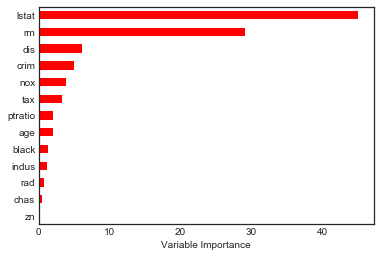

In [38]:
# Compare the importance of each variables in the model
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# Boosting

In [39]:
# Using the Gradient Boosting Regressor Model for the same study
regr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=1)
regr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto', random_state=1,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

zn          0.010346
chas        0.121257
rad         0.150597
black       0.459114
indus       0.497222
nox         0.791744
age         0.880128
tax         1.108479
crim        2.684293
ptratio     4.452571
dis         5.987496
rm         27.934650
lstat      54.922104
dtype: float64


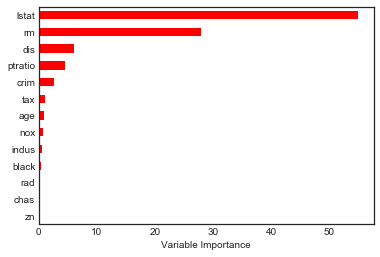

In [40]:
# Compare the importance of each features in the model
feature_importance = regr.feature_importances_*100
rel_imp = pd.Series(feature_importance, index=X.columns).sort_values(inplace=False)
print(rel_imp)
rel_imp.T.plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [41]:
# Check the mean squared error
mean_squared_error(y_test, regr.predict(X_test))

15.585284273714013